<a href="https://colab.research.google.com/github/Bray-Nyagwoka/ISTG6010-2025/blob/main/Week%206_African%20Lion_Image%20Detection_NNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

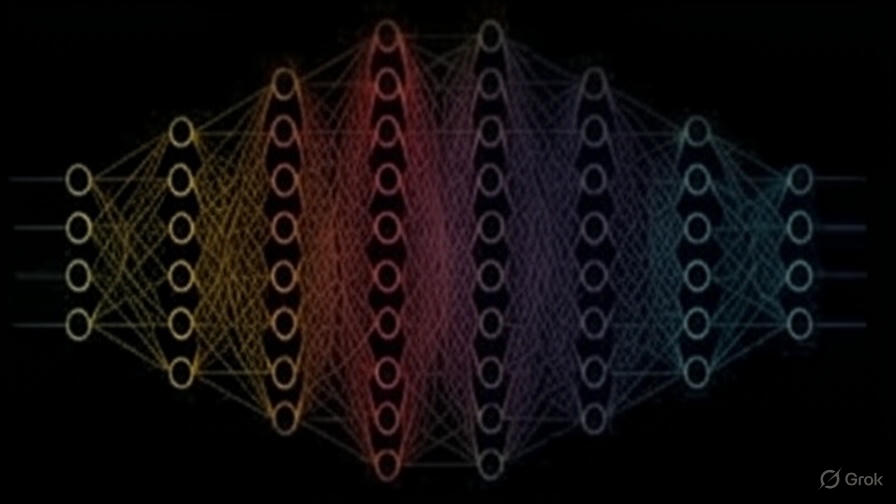

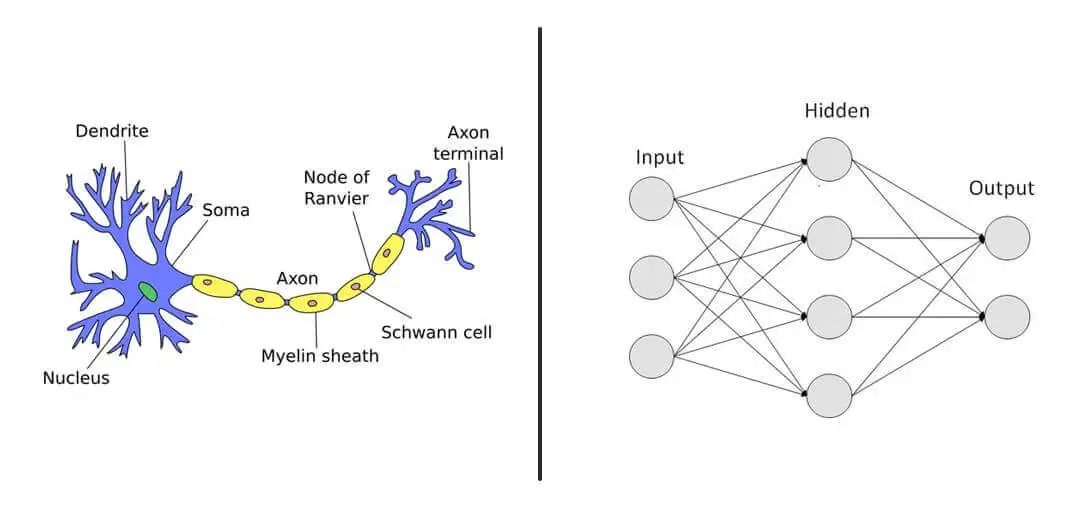

# **Neural Networks**

## What is a neural network?

A neural network is a computational system inspired by the human brain that learns to recognize patterns in data to perform tasks like image recognition, natural language processing, and making predictions. It consists of interconnected layers of "neurons" or nodes—an input layer, one or more hidden layers, and an output layer—that process information. The network "learns" by adjusting the strengths (weights) of these connections based on training data to produce accurate results.

---

# How it works

https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

---

## Input layer:
This layer receives the raw data, where each neuron represents a single feature of the input. For example, if the network is processing an image, each pixel could be a neuron in the input layer.

The artificial neuron's input connections correspond to the ***dendrites*** of a biological neuron

## Hidden layers:
These are layers between the input and output layers where the bulk of the processing happens. Each layer transforms the data from the previous layer through mathematical operations. A deeper network (more hidden layers) can learn more complex patterns.

## Output layer:
This layer produces the final result or prediction after the data has been processed through all the hidden layers.

The activation function is analogous to the ***cell body and axon*** integrating signals and firing an output.

## Connections and weights:
Neurons are connected, and each connection has a weight that determines the strength of the signal passed between neurons. The network learns by adjusting these weights to minimize the difference between its predicted output and the desired output during training.

- The organization of layers and interconnected nodes in an artificial neural network is inspired by the ***cerebral cortex***, the outer layer of the brain responsible for complex functions
---

# Key capabilities and applications

## Pattern recognition:
Neural networks excel at identifying complex patterns and relationships within data that would be difficult for humans to find manually.

##Learning and adaptation:
They can learn from new, unseen data and adapt their predictions without needing a complete redesign of the system.

## Wide range of applications:
They are used in diverse fields such as medical diagnosis, financial forecasting, autonomous vehicles, and targeted marketing


This notebook demonstrates how to:
- Upload an image from your computer
- Preprocess the image for a neural network
- Use a pre-trained ResNet50 model to classify the image
- Display the top predictions with confidence scores

---
# Step 1: Load libraries and packages

In [ ]:
# Image Classification with Deep Learning in Google Colab
### Using Pre-trained ResNet50 on ImageNet



### Step 1: Import Required Libraries

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import numpy as np
from google.colab import files
from IPython.display import Image as IPImage, display
import matplotlib.pyplot as plt

Explanation:
We use TensorFlow and Keras to load the pre-trained ResNet50 model (trained on over 1 million images from ImageNet).
decode_predictions converts numeric class IDs into human-readable labels (e.g., "Egyptian cat", "sports car").

# Step 2: Load the Pre-trained ResNet50 Model

In [ ]:
# Load the ResNet50 model pre-trained on ImageNet
model = ResNet50(weights='imagenet')

print("ResNet50 model loaded successfully!")
print(f"Model expects input images of size: {model.input_shape}")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
ResNet50 model loaded successfully!
Model expects input images of size: (None, 224, 224, 3)


Explanation:

weights='imagenet': Downloads the model weights trained on the ImageNet dataset (~1000 classes).
The model expects images of size 224x224 pixels with 3 color channels (RGB).


# Step 3: Upload an Image from Your Computer

Please upload an image file (JPG or PNG recommended)


Saving animal-hero-lionB.jpg to animal-hero-lionB.jpg
Uploaded: animal-hero-lionB.jpg


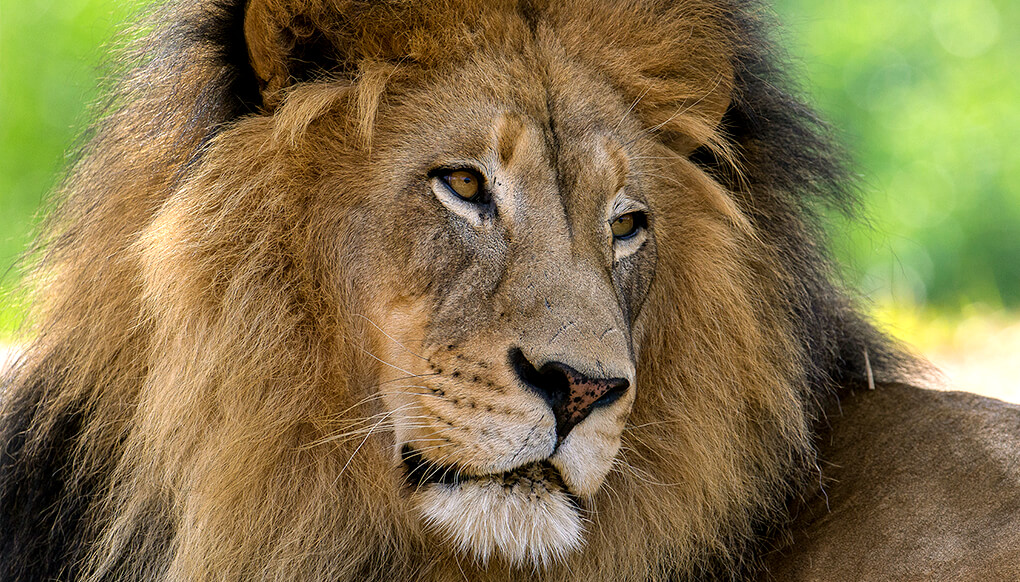

In [ ]:
print("Please upload an image file (JPG or PNG recommended)")
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]
print(f"Uploaded: {filename}")

# Display the uploaded image
display(IPImage(filename=filename, width=400))

Explanation:
files.upload() opens a dialog allowing you to select an image from your local machine.
We then display the image so you can confirm it's correct.

# Step 4: Preprocess the Uploaded Image

In [ ]:
# Load and preprocess the image
img = image.load_img(filename, target_size=(224, 224))  # Resize to 224x224
img_array = image.img_to_array(img)                     # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension (1, 224, 224, 3)
img_array = preprocess_input(img_array)                 # Apply ResNet-specific preprocessing

print("Image shape after preprocessing:", img_array.shape)

Image shape after preprocessing: (1, 224, 224, 3)


Explanation:

The image is resized to 224×224 (required by ResNet50).
Converted from PIL format to a NumPy array.
Expanded to include a batch dimension.
preprocess_input subtracts mean RGB values and applies scaling used during training.


# Step 5: Make Predictions

In [ ]:
# Perform prediction
predictions = model.predict(img_array)

# Decode the top 5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]

print("Top 5 Predictions:")
print("-" * 50)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Top 5 Predictions:
--------------------------------------------------
1: lion (0.9619)
2: groenendael (0.0138)
3: wallaby (0.0060)
4: orangutan (0.0028)
5: baboon (0.0021)


Explanation:
decode_predictions returns the top 5 most likely classes with their confidence scores (probabilities).

# Step 6: Visualize the Results with a Bar Chart

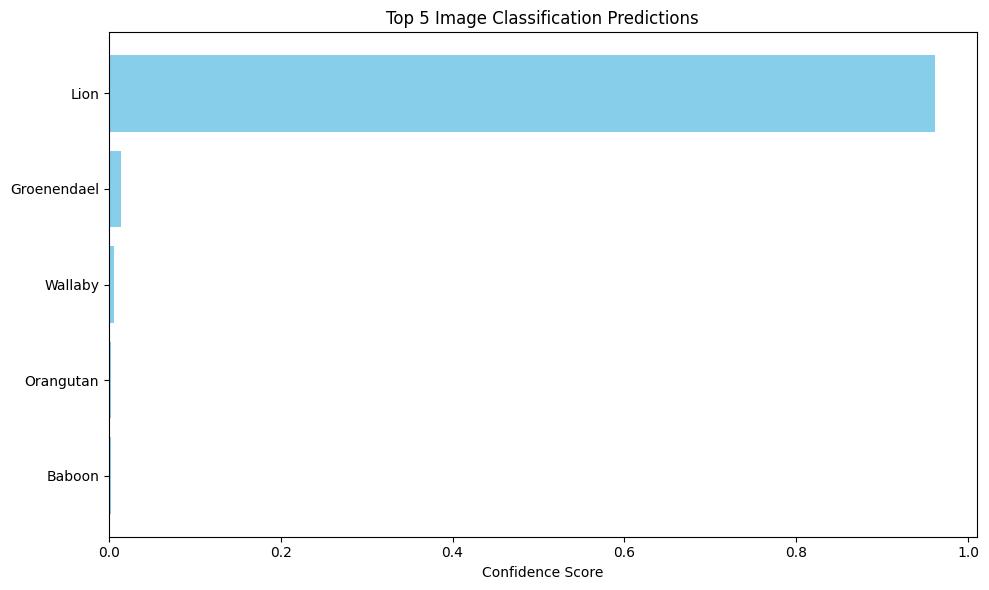

In [ ]:
# Extract labels and scores
labels = [pred[1] for pred in decoded_predictions]
scores = [pred[2] for pred in decoded_predictions]

# Replace underscores with spaces and capitalize for better display
labels = [label.replace('_', ' ').title() for label in labels]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(labels)), scores, color='skyblue')
plt.yticks(range(len(labels)), labels)
plt.xlabel('Confidence Score')
plt.title('Top 5 Image Classification Predictions')
plt.gca().invert_yaxis()  # Highest score on top
plt.tight_layout()
plt.show()

## Explanation:
A clean horizontal bar chart shows the model’s confidence in each predicted class.

Try It With Different Images
Try uploading:

* A dog or cat
* A car
* A fruit (e.g., banana, apple)
* A landmark (e.g., Eiffel Tower)

The model knows over 1000 different classes from everyday objects to animals and vehicles.

---

## Tensorflow Playground:
The TensorFlow Playground is an interactive, web-based tool that lets users visually experiment with neural networks and see how changes to hyperparameters affect a model's performance in real-time. It provides a user-friendly interface for understanding core concepts like layers, neurons, and activation functions without needing to write code. The tool is primarily used as an educational resource to learn about machine learning fundamentals through hands-on experimentation.

https://playground.tensorflow.org

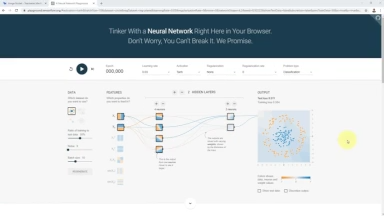

https://www.google.com/search?q=what+is+the+tensorflow+playground&rlz=1C5GCEM_enUS1154US1154&oq=what+is+the+tensorflow+playground&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIICAEQABgWGB4yDQgCEAAYhgMYgAQYigUyDQgDEAAYhgMYgAQYigUyCggEEAAYgAQYogQyBwgFEAAY7wUyCggGEAAYgAQYogQyCggHEAAYogQYiQXSAQg5MjQ1ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:e6fd75f7,vid:ZNrmS6q_Zp4,st:0

# So what are Deep Fakes?

https://www.youtube.com/watch?v=iyiOVUbsPcM